In [1]:
from google.colab import drive
drive.mount("drive")

Mounted at drive


# Import library yang dibutuhkan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Load Data

In [3]:
base_dir = "/content/drive/MyDrive/datasets/book/"
books = pd.read_csv(base_dir+"Books.csv")
ratings = pd.read_csv(base_dir+"Ratings.csv")
users = pd.read_csv(base_dir+"Users.csv")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Exploratory Data Analysis

## Deskripsi Variabel
Dataset terbagi menjadi 3 kategori, *ratings*, *user profile*, dan *books*.

- ISBN merupakan identitas unik suatu buku, satu ISBN untuk satu buku.
- book_title merupakan judul buku
- book_author merupakan pengarang
- year_of_publication merupakan tahun terbit buku
- publisher merupakan penerbit buku
- image_url_s merupakan gambar dari buku yang berukuran kecil
- image_url_m merupakan gambar dari buku yang berukuran medium
- image_url_l merupakan gambar dari buku yang berukuran besar
- user_id merupakan id unik pengguna
- location merupakan lokasi pengguna
- age merupakan umur pengguna
- rating merupakan *rating* dari pengguna


In [4]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


## Mengubah teks pada kolom menjadi huruf kecil sekaligus mengubah "-" menjadi "_" agar mempermudah proses pemanggilan.

In [5]:
books.columns = books.columns.str.lower()
books.columns = books.columns.str.replace("-","_")

ratings.columns = ratings.columns.str.lower()
ratings.columns = ratings.columns.str.replace("-","_")

users.columns = users.columns.str.lower()
users.columns = users.columns.str.replace("-","_")


In [6]:
# books
# ratings
users

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


## Melihat jenis tipe data *dataframe books*

In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271360 non-null  object
 1   book_title           271360 non-null  object
 2   book_author          271359 non-null  object
 3   year_of_publication  271360 non-null  object
 4   publisher            271358 non-null  object
 5   image_url_s          271360 non-null  object
 6   image_url_m          271360 non-null  object
 7   image_url_l          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


*Data Frame* di atas memiliki 271360 baris data dengan keseluruhannya bertipe data object. Jika dilihat dari keseluruhan total data yang ada, terdapat missing values pada kolom book_author (271359 baris), publisher, dan image_url_l. Namun mari kita tangani nanti.

## Memastikan tiap satu ISBN mencakup satu buku

In [8]:
books["isbn"].duplicated().sum()

0

## judul buku unik 

In [9]:
print(f"Banyak data buku yang unik berdasarkan judul : {len(books['book_title'].unique())}")
print(f"Banyak data buku yang unik berdasarkan ISBN : {len(books['isbn'].unique())}")

Banyak data buku yang unik berdasarkan judul : 242135
Banyak data buku yang unik berdasarkan ISBN : 271360


Berdasarkan data di atas, didapatkan beberapa informasi sebagai berikut:  
1. Jumlah seluruh data buku yang unik yakni 271360, hal ini karena menunjukkan bahwa satu ISBN hanya untuk satu buku.
2. Terdapat beberapa judul yang sama dengan ISBN yang berbeda, hal ini kemungkinan menunjukkan bahwa data buku dengan judul yang sama merupakan dua entitas yang berbeda. Seperti, kemungkinan buku berjudul x memiliki sequelnya.

In [10]:
books[books["book_title"].duplicated()].sample(5,axis=0)

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
162551,B0000C7BMU,High Water: A Novel,Lynn Hightower,2002,VHPS Virginia,http://images.amazon.com/images/P/B0000C7BMU.0...,http://images.amazon.com/images/P/B0000C7BMU.0...,http://images.amazon.com/images/P/B0000C7BMU.0...
57958,0380819333,Cowboy : A Novel,Sara Davidson,2001,HarperTorch,http://images.amazon.com/images/P/0380819333.0...,http://images.amazon.com/images/P/0380819333.0...,http://images.amazon.com/images/P/0380819333.0...
70014,5552027574,Presumed Innocent,Dalton,1987,Farrar Straus Giroux,http://images.amazon.com/images/P/5552027574.0...,http://images.amazon.com/images/P/5552027574.0...,http://images.amazon.com/images/P/5552027574.0...
122573,0671656821,MOSCOW RULES,Robert Moss,1987,Pocket,http://images.amazon.com/images/P/0671656821.0...,http://images.amazon.com/images/P/0671656821.0...,http://images.amazon.com/images/P/0671656821.0...
250550,0374219699,The Natural Man,Ed McClanahan,1983,Farrar Straus &amp; Giroux,http://images.amazon.com/images/P/0374219699.0...,http://images.amazon.com/images/P/0374219699.0...,http://images.amazon.com/images/P/0374219699.0...


Data di atas merupakan list buku yang memiliki judul yang duplikat. Selanjutnya mari kita lihat salah satu data pada judul buku di atas.

In [11]:
books[books["book_title"] == "El Ladron De Cuerpos"]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
130610,8466302360,El Ladron De Cuerpos,Anne Rice,2002,Distribooks,http://images.amazon.com/images/P/8466302360.0...,http://images.amazon.com/images/P/8466302360.0...,http://images.amazon.com/images/P/8466302360.0...
142700,8440666896,El Ladron De Cuerpos,Anne Rice,1999,Ediciones B,http://images.amazon.com/images/P/8440666896.0...,http://images.amazon.com/images/P/8440666896.0...,http://images.amazon.com/images/P/8440666896.0...
224479,9500814331,El Ladron De Cuerpos,Anne Rice,1996,Libros Sin Fronteras,http://images.amazon.com/images/P/9500814331.0...,http://images.amazon.com/images/P/9500814331.0...,http://images.amazon.com/images/P/9500814331.0...


Sudah terlihat, bahwa judul buku sama yang memiliki ISBN berbeda merupakan dua entitas yang berbeda. Jika dilihat pada tahun publikasi di atas, buku dengan judul "El Ladron De Cuerpos" dipublikasi pada tahun yang berbeda. Berdasarkan hal tersebut, dapat disimpulkan bahwa buku dengan judul tersebut memiliki sequel lanjutannya.

## Banyak data user yang unik

In [12]:
users

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [13]:
print(f"Banyak data user unik : {len(users['user_id'].unique())}")

Banyak data user unik : 278858


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


## Banyak data ratings

In [15]:
ratings

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [16]:
print(f"Banyak data rating :{len(ratings)}")
print(f"Jumlah buku yang telah diberi rating : {len(ratings['isbn'].unique())}")
print(f"Jumlah user yang memberikan rating : {len(ratings['user_id'].unique())}")

Banyak data rating :1149780
Jumlah buku yang telah diberi rating : 340556
Jumlah user yang memberikan rating : 105283


In [17]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1149780 non-null  int64 
 1   isbn         1149780 non-null  object
 2   book_rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


## Rentang rating

In [18]:
ratings.describe().round(3)

,user_id,book_rating
count,1149780.000,1149780.000
mean,140386.395,2.867
std,80562.278,3.854
min,2.000,0.000
25%,70345.000,0.000
50%,141010.000,0.000
75%,211028.000,7.000
max,278854.000,10.000


Rating buku berentang antara 0 - 10 (terendah ke tertinggi)

# Data Preprocessing

In [19]:
print(f"Jumlah seluruh data buku berdasarkan ISBN : {len(books['isbn'].unique())}")
print(f"Jumlah seluruh data buku berdasarkan judul buku : {len(books['book_title'].unique())}")
print(f"Jumlah seluruh users : {len(users['user_id'].unique())}")
print(f"Jumlah seluruh rating : {len(ratings)}")

Jumlah seluruh data buku berdasarkan ISBN : 271360
Jumlah seluruh data buku berdasarkan judul buku : 242135
Jumlah seluruh users : 278858
Jumlah seluruh rating : 1149780


## Menggabungkan data ratings dengan judul buku

In [20]:
all_book = ratings
all_book

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [21]:
all_book = pd.merge(all_book, books[["isbn","book_title"]], on="isbn", how="left")
all_book

,user_id,isbn,book_rating,book_title
0,276725,034545104X,0,Flesh Tones: A Novel
1,276726,0155061224,5,Rites of Passage
2,276727,0446520802,0,The Notebook
3,276729,052165615X,3,Help!: Level 1
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...
...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback))
1149778,276721,0590442449,10,Fourth Grade Rats


# Data Preparation

## Menangani *Missing Values*

In [22]:
all_book

,user_id,isbn,book_rating,book_title
0,276725,034545104X,0,Flesh Tones: A Novel
1,276726,0155061224,5,Rites of Passage
2,276727,0446520802,0,The Notebook
3,276729,052165615X,3,Help!: Level 1
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...
...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback))
1149778,276721,0590442449,10,Fourth Grade Rats


In [23]:
all_book.isna().sum()

user_id             0
isbn                0
book_rating         0
book_title     118644
dtype: int64

Berdasarkan jumlah data rating yang ada (1 juta lebih), *missing value* berjumlah 100 ribu data. Sehingga tidak apa jika kita menghapus *missing value* pada kolom book_title

In [24]:
all_book_clean = all_book.dropna()
all_book_clean

,user_id,isbn,book_rating,book_title
0,276725,034545104X,0,Flesh Tones: A Novel
1,276726,0155061224,5,Rites of Passage
2,276727,0446520802,0,The Notebook
3,276729,052165615X,3,Help!: Level 1
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...
...,...,...,...,...
1149774,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback))


Setelah menghapus baris data yang mengandung *missing value*, kini data berjumlah 1031136 baris data.

## Membuat dataframe baru yang berisi isbn dan judul buku

In [25]:
preparation = all_book_clean
preparation

,user_id,isbn,book_rating,book_title
0,276725,034545104X,0,Flesh Tones: A Novel
1,276726,0155061224,5,Rites of Passage
2,276727,0446520802,0,The Notebook
3,276729,052165615X,3,Help!: Level 1
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...
...,...,...,...,...
1149774,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback))


In [26]:
book_title, isbn = preparation["book_title"].tolist(), preparation["isbn"].tolist()
print(f"Jumlah data judul buku : {len(book_title)}")
print(f"Jumlah data isbn: {len(isbn)}") 


Jumlah data judul buku : 1031136
Jumlah data isbn: 1031136


In [27]:
book_new = pd.DataFrame({
    "isbn" : isbn,
    "title" : book_title
})
book_new

,isbn,title
0,034545104X,Flesh Tones: A Novel
1,0155061224,Rites of Passage
2,0446520802,The Notebook
3,052165615X,Help!: Level 1
4,0521795028,The Amsterdam Connection : Level 4 (Cambridge ...
...,...,...
1031131,0876044011,Edgar Cayce on the Akashic Records: The Book o...
1031132,1563526298,Get Clark Smart : The Ultimate Guide for the S...
1031133,0679447156,Eight Weeks to Optimum Health: A Proven Progra...
1031134,0515107662,The Sherbrooke Bride (Bride Trilogy (Paperback))


## Encode kolom user_id dan isbn

In [28]:
df = ratings
df

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [29]:
isbn_id = df["isbn"].unique().tolist()
user_id = df["user_id"].unique().tolist()

isbn_encoded = {key:values for values, key in enumerate(isbn_id)}
isbn_decoded = {key:values for key, values in enumerate(isbn_id)}

user_encoded = {key:values for values, key in enumerate(user_id)}
user_decoded = {key:values for key, values in enumerate(user_id)}

## Mapping terhadap dataframe

In [30]:
df["user_encoded"] = df["user_id"].map(user_encoded)
df["isbn_encoded"] = df["isbn"].map(isbn_encoded)
df

,user_id,isbn,book_rating,user_encoded,isbn_encoded
0,276725,034545104X,0,0,0
1,276726,0155061224,5,1,1
2,276727,0446520802,0,2,2
3,276729,052165615X,3,3,3
4,276729,0521795028,6,3,4
...,...,...,...,...,...
1149775,276704,1563526298,9,105278,226347
1149776,276706,0679447156,0,105279,7295
1149777,276709,0515107662,10,105280,12065
1149778,276721,0590442449,10,105281,78598


In [31]:
num_users = len(user_encoded)
num_books = len(isbn_encoded)

print(f"Banyak user : {num_users}")
print(f"Banyak buku : {num_books}")

Banyak user : 105283
Banyak buku : 340556


## Mengubah tipe data kolom book_rating menjadi float

In [32]:
df["book_rating"] = df["book_rating"].values.astype(np.float64)
df

,user_id,isbn,book_rating,user_encoded,isbn_encoded
0,276725,034545104X,0.0,0,0
1,276726,0155061224,5.0,1,1
2,276727,0446520802,0.0,2,2
3,276729,052165615X,3.0,3,3
4,276729,0521795028,6.0,3,4
...,...,...,...,...,...
1149775,276704,1563526298,9.0,105278,226347
1149776,276706,0679447156,0.0,105279,7295
1149777,276709,0515107662,10.0,105280,12065
1149778,276721,0590442449,10.0,105281,78598


## Membagi data latih dan data validasi

### Mengacak dataframe

In [33]:
df = df.sample(frac=1, random_state=99)
df

,user_id,isbn,book_rating,user_encoded,isbn_encoded
987138,237186,349933044X,0.0,90264,311732
833764,201526,0671873210,0.0,76678,46807
1025257,245827,0517570262,0.0,93600,199536
129194,29978,084871993X,0.0,12019,78511
150103,33974,0310711118,0.0,13699,87131
...,...,...,...,...,...
384803,93047,0671519204,0.0,36100,169070
1113342,266866,0552146153,5.0,101625,49472
806273,196077,0140431225,0.0,74663,121264
843474,204316,0874776945,6.0,77692,19218


### Membagi data 85% data latih dan 15% data validasi, sekaligus normalisasi kolom rating berkisar 0-1

In [34]:
x = df[["user_encoded","isbn_encoded"]]
min = df["book_rating"].min()
max = df["book_rating"].max()
y = df["book_rating"].apply(lambda x:(x-min) / (max-min) )

split = int(0.85 * df.shape[0])
X_train, X_val, Y_train, Y_val = (
    x[:split],
    x[split:],
    y[:split],
    y[split:]
)


# Modeling

In [35]:
class RecommenderBook(tf.keras.Model):
  def __init__(self, num_users, num_books, embedding_size, **kwargs):
    super(RecommenderBook, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_books=num_books
    self.embedding_size=embedding_size
    self.user_embedding = tf.keras.layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer="he_normal",
        embeddings_regularizer=tf.keras.regularizers.l2(0.00001)
    )
    self.user_bias = tf.keras.layers.Embedding(num_users, 1)
    self.book_embedding = tf.keras.layers.Embedding(
        num_books,
        embedding_size,
        embeddings_initializer="he_normal",
        embeddings_regularizer=tf.keras.regularizers.l2(0.00001)
      )
    self.book_bias=tf.keras.layers.Embedding(num_books, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0]) 
    book_vector = self.book_embedding(inputs[:, 1])
    book_bias = self.book_bias(inputs[:, 1]) 
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [36]:
model = RecommenderBook(num_users, num_books, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [37]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=64, epochs=25)

Epoch 1/25
15271/15271 [==============================] - 243s 16ms/step - loss: 0.6220 - root_mean_squared_error: 0.3986 - val_loss: 0.5856 - val_root_mean_squared_error: 0.3761
Epoch 2/25
15271/15271 [==============================] - 214s 14ms/step - loss: 0.5759 - root_mean_squared_error: 0.3712 - val_loss: 0.5699 - val_root_mean_squared_error: 0.3679
Epoch 3/25
15271/15271 [==============================] - 211s 14ms/step - loss: 0.5611 - root_mean_squared_error: 0.3635 - val_loss: 0.5589 - val_root_mean_squared_error: 0.3624
Epoch 4/25
15271/15271 [==============================] - 211s 14ms/step - loss: 0.5502 - root_mean_squared_error: 0.3579 - val_loss: 0.5505 - val_root_mean_squared_error: 0.3583
Epoch 5/25
15271/15271 [==============================] - 211s 14ms/step - loss: 0.5415 - root_mean_squared_error: 0.3535 - val_loss: 0.5442 - val_root_mean_squared_error: 0.3551
Epoch 6/25
15271/15271 [==============================] - 211s 14ms/step - loss: 0.5346 - root_mean_squar

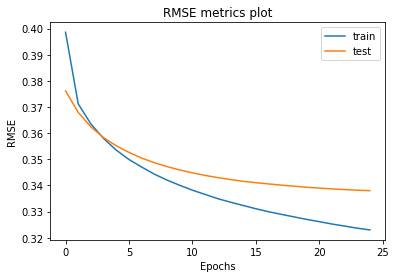

In [38]:
plt.plot(history.history["root_mean_squared_error"])
plt.plot(history.history["val_root_mean_squared_error"])
plt.title("RMSE metrics plot")
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend(["train","test"])
plt.savefig("evaluation.png", dpi=75)
plt.show()

# Result

## Memperoleh hasil rekomendasi

In [61]:
book_df = book_new
df = pd.read_csv("/content/drive/MyDrive/datasets/book/Ratings.csv")

user_id = df["User-ID"].sample(1).iloc[0]
readed_book_by_user = df[df["User-ID"] == user_id]

book_not_readed = book_df[~book_df["isbn"].isin(readed_book_by_user["ISBN"].values)]["isbn"]
book_not_readed = list(
    set(book_not_readed).intersection(set(isbn_encoded.keys()))
)
book_not_readed = [[isbn_encoded.get(x)] for x in book_not_readed]
user_encoder = user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_readed), book_not_readed)
)

In [67]:
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_id = [
    isbn_decoded.get(book_not_readed[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)
 
top_book_user = (
    readed_book_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
book_df_rows = book_df[book_df['isbn'].isin(top_book_user)].drop_duplicates()
for row in book_df_rows.itertuples():
    print(row.isbn, ':', row.title)
 
print('----' * 8)
print('Top 10 Book recommendation')
print('----' * 8)
 
recommended_book = book_df[book_df['isbn'].isin(recommended_book_id)].drop_duplicates()
for row in recommended_book.itertuples():
    print(row.isbn, ':', row.title)

Showing recommendations for users: 258152
Book with high ratings from user
--------------------------------
0440134056 : Hacker's Heroes of Computers
0465026567 : GÃ¶del, Escher, Bach: An Eternal Golden Braid
0553572539 : Chaos and Order : The Gap Into Madness (Gap)
0553573284 : This Day All Gods Die: The Gap into Ruin (Gap)
--------------------------------
Top 10 Book recommendation
--------------------------------
043935806X : Harry Potter and the Order of the Phoenix (Book 5)
0439064864 : Harry Potter and the Chamber of Secrets (Book 2)
0812550706 : Ender's Game (Ender Wiggins Saga (Paperback))
0439136350 : Harry Potter and the Prisoner of Azkaban (Book 3)
0439139597 : Harry Potter and the Goblet of Fire (Book 4)
0590353403 : Harry Potter and the Sorcerer's Stone (Book 1)
0060256672 : Where the Sidewalk Ends : Poems and Drawings
1844262553 : Free
8445071416 : El Hobbit
0064440508 : A Kiss for Little Bear
